# CMSC641 final Project

## Mahdi Navari

# 1- Introduction

##### Required Tools
I have used Python 3.5 and the following libraries:

- pandas
- numpy
- bs4
- requests
- matplotlib
- scikit-learn
- geopy.geocoders

I have also used Anaconda (https://www.continuum.io) to manage and install the python libraries.

The goal of this project is to inspire people to be more conscious of the environment by reducing solid wastes. The plan is to find the cities (communities) who are more likely to respond to waste reduction campaign.

#### Data sources 
Disposal/Diversion data - California Diversion/Disposal Progress report between 2010-2016 http://www.calrecycle.ca.gov/LGCentral/Reports/Jurisdiction/DiversionDisposal.aspx

Census Data - California Demographics, Economics, and Housing census data 2013-2016       
https://www.census.gov/acs/www/data/data-tables-and-tools/data-profiles


# 2- Collecting data

## 2-1- Solid waste data 

Scrap California recycling website by looping through different cities from 2010 to 2016
The function **read_webpage** gets the $url$ and extracts all tabled in each page and saves the content in a python list.
The following code generates $url$ using $basedurl$ and $year$ and $city id$ and stores the data in a data frame and finally save the data as a csv file. 

In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np
from requests import get

In [2]:
def read_webpage (url):
    response = get(url)
    soup = BeautifulSoup(response.text, 'html.parser')
    tables = soup.find_all('table')
    data = [] # create an empty list to hold all the data
    for j in range(len(tables)):
        data_rows = tables[j].findAll('tr')
        for i in range(len(data_rows)):  # for each table row
            data_row = []  # create an empty list for each row
            # for each table data element from each table row
            for td in data_rows[i].findAll('td'):        
                # get the text content and append to the 
                data_row.append(td.getText().strip().replace(',', ''))        
                # then append each row to the data matrix
            data.append(data_row)    
    raw_data = [data[0][1], data[0][3] , data[1][1], 
    data[2][1], data[13][1], data[14][1], data[15][1], data[16][1], data[19][2], data[19][4] ,
    data[20][1], data[20][2], data[20][3], data[20][4], 
    data[21][1], data[21][2], data[21][3], data[21][4]]
    return raw_data

In [34]:
df_rows = []
baseurl = "http://www.calrecycle.ca.gov/LGCentral/Reports/DiversionProgram/JurisdictionDiversionDetail.aspx?JurisdictionID="
for yr in [2010, 2011, 2012, 2013, 2014, 2015, 2016]:  
    for i in range (1,625) : 
        url = baseurl + str(i) + "&Year=" + str(yr)
        data = read_webpage (url)
        df_rows.append(data)
        if i % 25 == 0: 
            #print (yr, i)

column_name = ['Jurisdiction', 
'Reporting Year',
'County',
'Reporting-Year Disposal Amount (tons)',
'Total Adjusted Reporting-Year Disposal Amount (tons)',
'Reporting-Year Transformation Waste (tons)',
'Reporting-Year Population',
'Reporting-Year Employment',
'Disposal Rate without Transformation (pounds/person/day) (Population-Annual)',
'Disposal Rate without Transformation (pounds/person/day) (Employment-Annual)',
'Transformation Rate (pounds/person/day) (Population-Traget)',
'Transformation Rate (pounds/person/day) (Population-Annual)',
'Transformation Rate (pounds/person/day) (Employment-Traget)', 
'Transformation Rate (pounds/person/day) (Employment-Annual)',
'Calculated Disposal Rate (pounds/person/day) (Population-Traget)',
'Calculated Disposal Rate (pounds/person/day) (Population-Annual)',
'Calculated Disposal Rate (pounds/person/day) (Employment-Traget)',
'Calculated Disposal Rate (pounds/person/day) (Employment-Annual)']
df = pd.DataFrame(df_rows, columns=column_name)
df
df.to_csv('waste_data.csv')

2010 25
2010 50
2010 75
2010 100
2010 125
2010 150
2010 175
2010 200
2010 225
2010 250
2010 275
2010 300
2010 325
2010 350
2010 375
2010 400
2010 425
2010 450
2010 475
2010 500
2010 525
2010 550
2010 575
2010 600
2011 25
2011 50
2011 75
2011 100
2011 125
2011 150
2011 175
2011 200
2011 225
2011 250
2011 275
2011 300
2011 325
2011 350
2011 375
2011 400
2011 425
2011 450
2011 475
2011 500
2011 525
2011 550
2011 575
2011 600
2012 25
2012 50
2012 75
2012 100
2012 125
2012 150
2012 175
2012 200
2012 225
2012 250
2012 275
2012 300
2012 325
2012 350
2012 375
2012 400
2012 425
2012 450
2012 475
2012 500
2012 525
2012 550
2012 575
2012 600
2013 25
2013 50
2013 75
2013 100
2013 125
2013 150
2013 175
2013 200
2013 225
2013 250
2013 275
2013 300
2013 325
2013 350
2013 375
2013 400
2013 425
2013 450
2013 475
2013 500
2013 525
2013 550
2013 575
2013 600
2014 25
2014 50
2014 75
2014 100
2014 125
2014 150
2014 175
2014 200
2014 225
2014 250
2014 275
2014 300
2014 325
2014 350
2014 375
2014 400
2014 42

In [3]:
file = 'waste_data.csv' 
df_tmp = pd.read_csv(file, encoding='latin-1',  index_col='Unnamed: 0' )

### 2-2-1- Cleaning the solid waste data
- Drop the first 3 years to be consistent with the census data    
- Compute diversion rates 
- Drop the extra columns 

In [4]:
df = df_tmp.copy()
df = df.dropna(how='all')
df['Reporting Year'] = df['Reporting Year'].astype(np.int64)
df = df[df['Reporting Year'] != 2010]
df = df[df['Reporting Year'] != 2011]
df = df[df['Reporting Year'] != 2012]
df.head()

,Jurisdiction,Reporting Year,County,Reporting-Year Disposal Amount (tons),Total Adjusted Reporting-Year Disposal Amount (tons),Reporting-Year Transformation Waste (tons),Reporting-Year Population,Reporting-Year Employment,Disposal Rate without Transformation (pounds/person/day) (Population-Annual),Disposal Rate without Transformation (pounds/person/day) (Employment-Annual),Transformation Rate (pounds/person/day) (Population-Traget),Transformation Rate (pounds/person/day) (Population-Annual),Transformation Rate (pounds/person/day) (Employment-Traget),Transformation Rate (pounds/person/day) (Employment-Annual),Calculated Disposal Rate (pounds/person/day) (Population-Traget),Calculated Disposal Rate (pounds/person/day) (Population-Annual),Calculated Disposal Rate (pounds/person/day) (Employment-Traget),Calculated Disposal Rate (pounds/person/day) (Employment-Annual)
1872,Adelanto,2013,San Bernardino,18049.74,18049.74,0.00,31289.0,4489.0,3.2,22.0,1.4,0.0,8.1,0.0,6.9,3.2,40.6,22.0
1873,Agoura Hills,2013,Los Angeles,20490.42,20490.42,7.87,20516.0,11366.0,5.5,9.9,1.4,0.0,3.0,0.0,7.0,5.5,15.2,9.9
1874,Alameda,2013,Alameda,35120.65,35120.65,1.73,75126.0,23557.0,2.6,8.2,1.1,0.0,4.3,0.0,5.5,2.6,21.4,8.2
1876,Alameda-Unincorporated,2013,Alameda,71234.56,71234.56,0.41,143820.0,28905.0,2.7,13.5,1.0,0.0,4.0,0.0,4.9,2.7,19.8,13.5
1877,Albany,2013,Alameda,6426.98,6426.98,0.00,18430.0,4202.0,1.9,8.4,1.0,0.0,3.9,0.0,5.0,1.9,19.3,8.4


### 2-2-2- Compute the diversion rate 
#### Terminology
$$ \mbox{Target trash production} = \mbox{Expected Annual trash production / 2}  $$

$$ \mbox{Divesion Rate= 1- Disposal /( 2 * Target)} $$
Percentage of recycling and transformation (diverting from landfill)

In [5]:
df['DiversionRateHouse'] = 1- df['Calculated Disposal Rate (pounds/person/day) (Population-Annual)']/(2 * df['Calculated Disposal Rate (pounds/person/day) (Population-Traget)'])
df['DiversionRateNoOfEmployee'] = 1- df['Calculated Disposal Rate (pounds/person/day) (Employment-Annual)']/(2 * df['Calculated Disposal Rate (pounds/person/day) (Employment-Traget)'])

### 2-2-3- Drop extra columns 

In [6]:
df = df[['Jurisdiction', 'Reporting Year', 'County', 'DiversionRateHouse', 'DiversionRateNoOfEmployee']]
df = df.rename(columns={'Reporting Year' : 'year'})
print (df.shape)
df.head()
#df.info()

(1628, 5)


,Jurisdiction,year,County,DiversionRateHouse,DiversionRateNoOfEmployee
1872,Adelanto,2013,San Bernardino,0.768116,0.729064
1873,Agoura Hills,2013,Los Angeles,0.607143,0.674342
1874,Alameda,2013,Alameda,0.763636,0.808411
1876,Alameda-Unincorporated,2013,Alameda,0.724490,0.659091
1877,Albany,2013,Alameda,0.810000,0.782383


## 2-2- Census Data (California Demographics, Economics, and Housing census)

Datasets (CSV files) were downloaded from (https://www.census.gov/acs/www/data/data-tables-and-tools/data-profiles)
Demographic data contains 327 features, Economic data contains 551 features, and housing data contains 567 features. 
I have cleaned the data and I have used feature reduction algorithm to reduce the features. 
I have used the results of feature reduction as a guideline to manually reduce the feature in each category. 
Results are presented in the following section.   

### 2-2-1- Demographic data
- Remove the white space form the object class. 
- Drop the id columns 
- Rename the columns 

In [7]:
file = './data/Demographics_selected.csv'
df_demo = pd.read_csv(file, encoding='latin-1', skiprows=1) 
df_demo = df_demo.apply(lambda x: x.str.strip() if x.dtype == "object" else x)
print(df_demo.shape)
df_demo.drop(df_demo.columns[0:2], axis =1, inplace=True)
df_demo.head()

(1925, 10)


,Geography,year,Estimate; SEX AND AGE - Total population,Estimate; SEX AND AGE - Median age (years),Percent; HISPANIC OR LATINO AND RACE - Hispanic or Latino (of any race),Percent; HISPANIC OR LATINO AND RACE - Not Hispanic or Latino - White alone,Percent; HISPANIC OR LATINO AND RACE - Not Hispanic or Latino - Black or African American alone,Percent; HISPANIC OR LATINO AND RACE - Not Hispanic or Latino - Asian alone
0,Adelanto,2013,29764,24.5,51.5,18.5,20.5,2.9
1,Agoura Hills,2013,20328,43.5,9.3,79.1,1.9,6.9
2,Alameda,2013,72512,40.2,11.4,45.0,5.6,31.8
3,Albany,2013,17921,36.2,8.6,53.5,3.2,30.0
4,Alhambra,2013,83389,38.7,34.1,10.9,1.2,52.6


In [8]:
df_demo.columns.tolist()

['Geography',
 'year',
 'Estimate; SEX AND AGE - Total population',
 'Estimate; SEX AND AGE - Median age (years)',
 'Percent; HISPANIC OR LATINO AND RACE - Hispanic or Latino (of any race)',
 'Percent; HISPANIC OR LATINO AND RACE - Not Hispanic or Latino - White alone',
 'Percent; HISPANIC OR LATINO AND RACE - Not Hispanic or Latino - Black or African American alone',
 'Percent; HISPANIC OR LATINO AND RACE - Not Hispanic or Latino - Asian alone']

In [9]:
old_names = ['Estimate; SEX AND AGE - Total population',
             'Estimate; SEX AND AGE - Median age (years)',
             'Percent; HISPANIC OR LATINO AND RACE - Hispanic or Latino (of any race)',
             'Percent; HISPANIC OR LATINO AND RACE - Not Hispanic or Latino - White alone',
             'Percent; HISPANIC OR LATINO AND RACE - Not Hispanic or Latino - Black or African American alone',
             'Percent; HISPANIC OR LATINO AND RACE - Not Hispanic or Latino - Asian alone'] 
new_names = ['Population','MedianAge', 'Latino', 'White', 'Black', 'Asian']
df_demo.rename(columns=dict(zip(old_names, new_names)), inplace=True)
df_demo.rename(columns={'Geography': 'Jurisdiction'}, inplace=True)
df_demo.head()

,Jurisdiction,year,Population,MedianAge,Latino,White,Black,Asian
0,Adelanto,2013,29764,24.5,51.5,18.5,20.5,2.9
1,Agoura Hills,2013,20328,43.5,9.3,79.1,1.9,6.9
2,Alameda,2013,72512,40.2,11.4,45.0,5.6,31.8
3,Albany,2013,17921,36.2,8.6,53.5,3.2,30.0
4,Alhambra,2013,83389,38.7,34.1,10.9,1.2,52.6


###  2-2-2- Economics data
- Remove the white space form the object class
- Drop the id columns 
- Rename the columns 

In [10]:
file = './data/Economics_selected.csv' 
df_econ = pd.read_csv(file, encoding='latin-1', skiprows=1, na_values=["(X)"]) 
df_econ = df_econ.apply(lambda x: x.str.strip() if x.dtype == "object" else x)
print(df_econ.shape)
df_econ.drop(df_econ.columns[0:2], axis =1, inplace=True)
df_econ.head()

(1925, 12)


,Geography,year,Estimate; EMPLOYMENT STATUS - In labor force - Civilian labor force,Estimate; EMPLOYMENT STATUS - In labor force - Civilian labor force - Employed,Estimate; EMPLOYMENT STATUS - In labor force - Civilian labor force - Unemployed,Percent; EMPLOYMENT STATUS - Percent Unemployed,Percent; EMPLOYMENT STATUS - In labor force (Females 16 years and over),Estimate; COMMUTING TO WORK - Mean travel time to work (minutes),Estimate; INCOME AND BENEFITS (INFLATION-ADJUSTED DOLLARS) - Median household income (dollars),Percent; PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL - All people
0,Adelanto,2013,10213,8202,2014,19.7,45.7,39.5,43305,25.6
1,Agoura Hills,2013,11631,10898,733,6.3,66.9,28.8,106886,4.0
2,Alameda,2013,39562,36352,3210,8.1,63.1,27.2,74221,10.1
3,Albany,2013,9333,8808,525,5.6,61.9,29.1,71994,8.7
4,Alhambra,2013,43899,40558,3341,7.6,57.6,29.1,51527,12.7


In [11]:
old_names = ['Estimate; EMPLOYMENT STATUS - In labor force - Civilian labor force',
             'Estimate; EMPLOYMENT STATUS - In labor force - Civilian labor force - Employed',
             'Estimate; EMPLOYMENT STATUS - In labor force - Civilian labor force - Unemployed',
             'Percent; EMPLOYMENT STATUS - Percent Unemployed',
             'Percent; EMPLOYMENT STATUS - In labor force (Females 16 years and over)',
             'Estimate; COMMUTING TO WORK - Mean travel time to work (minutes)',
             'Estimate; INCOME AND BENEFITS  (INFLATION-ADJUSTED DOLLARS) - Median household income (dollars)',
             'Percent; PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL - All people',
             'Geography'] 
new_names = ['LaberFocre', 'LaberForceEmplyed', 'LaberForceUnemployed',
             'UnemploymentRate', 'FemalesEmploymentRate', 'CoummuteTime', 'MedianIncome', 'PovertyRate', 'Jurisdiction']

df_econ.rename(columns=dict(zip(old_names, new_names)), inplace=True)
df_econ.head()

,Jurisdiction,year,LaberFocre,LaberForceEmplyed,LaberForceUnemployed,UnemploymentRate,FemalesEmploymentRate,CoummuteTime,MedianIncome,PovertyRate
0,Adelanto,2013,10213,8202,2014,19.7,45.7,39.5,43305,25.6
1,Agoura Hills,2013,11631,10898,733,6.3,66.9,28.8,106886,4.0
2,Alameda,2013,39562,36352,3210,8.1,63.1,27.2,74221,10.1
3,Albany,2013,9333,8808,525,5.6,61.9,29.1,71994,8.7
4,Alhambra,2013,43899,40558,3341,7.6,57.6,29.1,51527,12.7


### 2-2-3- Housing data 
- Remove the white space form the object class. 
- Drop the id columns 
- Rename the columns 

In [12]:
file = './data/Housing_selected.csv' 
df_h = pd.read_csv(file, encoding='latin-1', skiprows=1, na_values=["(X)"]) 
df_h = df_h.apply(lambda x: x.str.strip() if x.dtype == "object" else x)
print(df_h.shape)
df_h.drop(df_h.columns[0:2], axis =1, inplace=True)
df_h.head()

(1925, 11)


,Geography,year,Estimate; UNITS IN STRUCTURE - Total housing units,"Percent; UNITS IN STRUCTURE - 1-unit, detached","Percent; UNITS IN STRUCTURE - 1-unit, attached",Percent; UNITS IN STRUCTURE - 20 or more units,Estimate; ROOMS - Median rooms,Estimate; VALUE - Median (dollars),Estimate; GROSS RENT - Median (dollars)
0,Adelanto,2013,8291,79.1,2.2,3.3,5.7,170500,988
1,Agoura Hills,2013,7681,70.2,13.4,7.6,6.6,740200,2000
2,Alameda,2013,31572,42.3,10.3,16.7,4.7,662300,1250
3,Albany,2013,7755,53.5,3.7,13.9,4.6,625400,1409
4,Alhambra,2013,30551,44.5,12.5,9.8,4.4,514800,1126


In [13]:
old_names = ['Estimate; UNITS IN STRUCTURE - Total housing units',
               'Percent; UNITS IN STRUCTURE - 1-unit, detached',
               'Percent; UNITS IN STRUCTURE - 1-unit, attached',
               'Percent; UNITS IN STRUCTURE - 20 or more units',
               'Estimate; ROOMS - Median rooms', 
               'Estimate; VALUE - Median (dollars)',
               'Estimate; GROSS RENT - Median (dollars)', 
               'Geography']
new_names = ['TotalUnit', '1-UnitDetached', '1-UnitAttached',
             'MoreThan20UnitsInStructure', 'MedianNoOfRooms', 'MedianHouseValue',
             'MedianGrossRent', 'Jurisdiction']

df_h.rename(columns=dict(zip(old_names, new_names)), inplace=True)
df_h.head()

,Jurisdiction,year,TotalUnit,1-UnitDetached,1-UnitAttached,MoreThan20UnitsInStructure,MedianNoOfRooms,MedianHouseValue,MedianGrossRent
0,Adelanto,2013,8291,79.1,2.2,3.3,5.7,170500,988
1,Agoura Hills,2013,7681,70.2,13.4,7.6,6.6,740200,2000
2,Alameda,2013,31572,42.3,10.3,16.7,4.7,662300,1250
3,Albany,2013,7755,53.5,3.7,13.9,4.6,625400,1409
4,Alhambra,2013,30551,44.5,12.5,9.8,4.4,514800,1126


## 2-3- Merging and further cleaning the data 
- First, merge the socio-economic data
- Merge the socio-economic data with the solid waste data

In [14]:
df_h.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1925 entries, 0 to 1924
Data columns (total 9 columns):
Jurisdiction                  1925 non-null object
year                          1925 non-null int64
TotalUnit                     1925 non-null int64
1-UnitDetached                1925 non-null float64
1-UnitAttached                1925 non-null float64
MoreThan20UnitsInStructure    1925 non-null float64
MedianNoOfRooms               1925 non-null float64
MedianHouseValue              1925 non-null object
MedianGrossRent               1925 non-null object
dtypes: float64(4), int64(2), object(3)
memory usage: 135.4+ KB


#### Convert object columns to numeric 

In [15]:
column_list = df_h.select_dtypes(include=[object]).columns.tolist()
column_list = column_list[1:]
column_list
df_h[column_list] = df_h[column_list].apply(pd.to_numeric, errors='coerce')
df_h.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1925 entries, 0 to 1924
Data columns (total 9 columns):
Jurisdiction                  1925 non-null object
year                          1925 non-null int64
TotalUnit                     1925 non-null int64
1-UnitDetached                1925 non-null float64
1-UnitAttached                1925 non-null float64
MoreThan20UnitsInStructure    1925 non-null float64
MedianNoOfRooms               1925 non-null float64
MedianHouseValue              1923 non-null float64
MedianGrossRent               1921 non-null float64
dtypes: float64(6), int64(2), object(1)
memory usage: 135.4+ KB


### 2-3-1- Merge demographic, economic, and housing data

In [16]:
df_tmp = pd.merge(df_demo,df_econ,  how='left', on=["year" , "Jurisdiction"])
df_tmp1= pd.merge(df_tmp,df_h,  how='left', on=["year" , "Jurisdiction"])
print (df_tmp1.shape)
df_tmp1.head()

(1925, 23)


,Jurisdiction,year,Population,MedianAge,Latino,White,Black,Asian,LaberFocre,LaberForceEmplyed,...,CoummuteTime,MedianIncome,PovertyRate,TotalUnit,1-UnitDetached,1-UnitAttached,MoreThan20UnitsInStructure,MedianNoOfRooms,MedianHouseValue,MedianGrossRent
0,Adelanto,2013,29764,24.5,51.5,18.5,20.5,2.9,10213,8202,...,39.5,43305,25.6,8291,79.1,2.2,3.3,5.7,170500.0,988.0
1,Agoura Hills,2013,20328,43.5,9.3,79.1,1.9,6.9,11631,10898,...,28.8,106886,4.0,7681,70.2,13.4,7.6,6.6,740200.0,2000.0
2,Alameda,2013,72512,40.2,11.4,45.0,5.6,31.8,39562,36352,...,27.2,74221,10.1,31572,42.3,10.3,16.7,4.7,662300.0,1250.0
3,Albany,2013,17921,36.2,8.6,53.5,3.2,30.0,9333,8808,...,29.1,71994,8.7,7755,53.5,3.7,13.9,4.6,625400.0,1409.0
4,Alhambra,2013,83389,38.7,34.1,10.9,1.2,52.6,43899,40558,...,29.1,51527,12.7,30551,44.5,12.5,9.8,4.4,514800.0,1126.0


### 2-3-2- Merge disposal rate with socio-economic data 

In [17]:
data = pd.merge(df, df_tmp1,  how='left', on=["year" , "Jurisdiction"])
print (data.shape)
data.head()

(1628, 26)


,Jurisdiction,year,County,DiversionRateHouse,DiversionRateNoOfEmployee,Population,MedianAge,Latino,White,Black,...,CoummuteTime,MedianIncome,PovertyRate,TotalUnit,1-UnitDetached,1-UnitAttached,MoreThan20UnitsInStructure,MedianNoOfRooms,MedianHouseValue,MedianGrossRent
0,Adelanto,2013,San Bernardino,0.768116,0.729064,29764.0,24.5,51.5,18.5,20.5,...,39.5,43305.0,25.6,8291.0,79.1,2.2,3.3,5.7,170500.0,988.0
1,Agoura Hills,2013,Los Angeles,0.607143,0.674342,20328.0,43.5,9.3,79.1,1.9,...,28.8,106886.0,4.0,7681.0,70.2,13.4,7.6,6.6,740200.0,2000.0
2,Alameda,2013,Alameda,0.763636,0.808411,72512.0,40.2,11.4,45.0,5.6,...,27.2,74221.0,10.1,31572.0,42.3,10.3,16.7,4.7,662300.0,1250.0
3,Alameda-Unincorporated,2013,Alameda,0.724490,0.659091,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Albany,2013,Alameda,0.810000,0.782383,17921.0,36.2,8.6,53.5,3.2,...,29.1,71994.0,8.7,7755.0,53.5,3.7,13.9,4.6,625400.0,1409.0


## 2-4- Clean the data
- Remove NaN
- Remove characters
- Fill data with the mean value
- Drop rows only if all columns are NaN

In [18]:
data = data[np.isfinite(data['MedianAge'])]
print(data.shape)
data.info()

(1381, 26)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1381 entries, 0 to 1621
Data columns (total 26 columns):
Jurisdiction                  1381 non-null object
year                          1381 non-null int64
County                        1381 non-null object
DiversionRateHouse            1381 non-null float64
DiversionRateNoOfEmployee     1381 non-null float64
Population                    1381 non-null float64
MedianAge                     1381 non-null float64
Latino                        1381 non-null float64
White                         1381 non-null float64
Black                         1381 non-null float64
Asian                         1381 non-null float64
LaberFocre                    1381 non-null float64
LaberForceEmplyed             1381 non-null float64
LaberForceUnemployed          1381 non-null float64
UnemploymentRate              1381 non-null float64
FemalesEmploymentRate         1381 non-null float64
CoummuteTime                  1381 non-null float64
Me

In [19]:
data = data.replace('^[**]+', np.NaN, regex=True)   
data = data.replace('^[-]+', np.NaN, regex=True) 
data = data.replace('^[+]+', np.NaN, regex=True) 
data = data.fillna(data.mean())

# 3- Feature Seclection
Note: Feature extraction is very different from Feature selection: the former consists in transforming arbitrary data, such as text or images, into numerical features usable for machine learning. The latter is a machine learning technique applied on these features.

Univariate feature selection works by selecting the best features based on univariate statistical tests. It can be seen as a preprocessing step to an estimator. 

I have used $SelectKBest$ which select features according to the k highest scores.

## 3-1- Feature Seclection using mutual_info_regression

In [20]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression
# For regression: f_regression, mutual_info_regression
# For classification: chi2, f_classif, mutual_info_classif

# load data
array = data.values
#array
X = array[:,5:].astype(np.float64)
Y = array[:,3].astype(np.float64)
print (type(Y))
print (Y.dtype)
print (X.shape)
# feature extraction
test = SelectKBest(score_func=mutual_info_regression, k=20)
fit = test.fit(X, Y)
# summarize scores
np.set_printoptions(precision=3)
#print(fit.scores_)
features = fit.transform(X)
# summarize selected features
print(features[0:2,:])
selected_feature = []
for i in range(features.shape[1]):
    selected_feature.append(data.columns[(data == features[0,i]).iloc[0]])
selected_feature

<class 'numpy.ndarray'>
float64
(1381, 21)
[[  2.976e+04   2.450e+01   5.150e+01   1.850e+01   2.050e+01   2.900e+00
    1.021e+04   8.202e+03   2.014e+03   4.570e+01   3.950e+01   4.330e+04
    2.560e+01   8.291e+03   7.910e+01   2.200e+00   3.300e+00   5.700e+00
    1.705e+05   9.880e+02]
 [  2.033e+04   4.350e+01   9.300e+00   7.910e+01   1.900e+00   6.900e+00
    1.163e+04   1.090e+04   7.330e+02   6.690e+01   2.880e+01   1.069e+05
    4.000e+00   7.681e+03   7.020e+01   1.340e+01   7.600e+00   6.600e+00
    7.402e+05   2.000e+03]]


[Index(['Population'], dtype='object'),
 Index(['MedianAge'], dtype='object'),
 Index(['Latino'], dtype='object'),
 Index(['White'], dtype='object'),
 Index(['Black'], dtype='object'),
 Index(['Asian'], dtype='object'),
 Index(['LaberFocre'], dtype='object'),
 Index(['LaberForceEmplyed'], dtype='object'),
 Index(['LaberForceUnemployed'], dtype='object'),
 Index(['FemalesEmploymentRate'], dtype='object'),
 Index(['CoummuteTime'], dtype='object'),
 Index(['MedianIncome'], dtype='object'),
 Index(['PovertyRate'], dtype='object'),
 Index(['TotalUnit'], dtype='object'),
 Index(['1-UnitDetached'], dtype='object'),
 Index(['1-UnitAttached'], dtype='object'),
 Index(['MoreThan20UnitsInStructure'], dtype='object'),
 Index(['MedianNoOfRooms'], dtype='object'),
 Index(['MedianHouseValue'], dtype='object'),
 Index(['MedianGrossRent'], dtype='object')]

## 3-2- Feature Extraction using f_regression

In [21]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
# For regression: f_regression, mutual_info_regression
# For classification: chi2, f_classif, mutual_info_classif

# load data
array = data.values
X = array[:,5:].astype(np.float64)
Y = array[:,3].astype(np.float64)

# feature extraction
test = SelectKBest(score_func=f_regression, k='all')
fit = test.fit(X, Y)

# summarize scores
np.set_printoptions(precision=3)
#print(fit.scores_)
features2 = fit.transform(X)
# summarize selected features
print(features2[0:2,:])
selected_feature2 = []
for i in range(features2.shape[1]):
    selected_feature2.append(data.columns[(data == features2[0,i]).iloc[0]])
selected_feature2

[[  2.976e+04   2.450e+01   5.150e+01   1.850e+01   2.050e+01   2.900e+00
    1.021e+04   8.202e+03   2.014e+03   1.970e+01   4.570e+01   3.950e+01
    4.330e+04   2.560e+01   8.291e+03   7.910e+01   2.200e+00   3.300e+00
    5.700e+00   1.705e+05   9.880e+02]
 [  2.033e+04   4.350e+01   9.300e+00   7.910e+01   1.900e+00   6.900e+00
    1.163e+04   1.090e+04   7.330e+02   6.300e+00   6.690e+01   2.880e+01
    1.069e+05   4.000e+00   7.681e+03   7.020e+01   1.340e+01   7.600e+00
    6.600e+00   7.402e+05   2.000e+03]]


[Index(['Population'], dtype='object'),
 Index(['MedianAge'], dtype='object'),
 Index(['Latino'], dtype='object'),
 Index(['White'], dtype='object'),
 Index(['Black'], dtype='object'),
 Index(['Asian'], dtype='object'),
 Index(['LaberFocre'], dtype='object'),
 Index(['LaberForceEmplyed'], dtype='object'),
 Index(['LaberForceUnemployed'], dtype='object'),
 Index(['UnemploymentRate'], dtype='object'),
 Index(['FemalesEmploymentRate'], dtype='object'),
 Index(['CoummuteTime'], dtype='object'),
 Index(['MedianIncome'], dtype='object'),
 Index(['PovertyRate'], dtype='object'),
 Index(['TotalUnit'], dtype='object'),
 Index(['1-UnitDetached'], dtype='object'),
 Index(['1-UnitAttached'], dtype='object'),
 Index(['MoreThan20UnitsInStructure'], dtype='object'),
 Index(['MedianNoOfRooms'], dtype='object'),
 Index(['MedianHouseValue'], dtype='object'),
 Index(['MedianGrossRent'], dtype='object')]

## 4 - Data Exploration
 - Convert the diversion rate to categorical variable 
 - Rearrange the data frame 
 - Visualizing the data 

In [22]:
bins = [0.0, 0.5, 0.65, 0.8, 1.0]
group_names = ['Low', 'Okay', 'Good', 'Great']
data['Bins'] = pd.cut(data['DiversionRateHouse'], bins)
data['D.R.E_category'] = pd.cut(data['DiversionRateNoOfEmployee'], bins, labels=group_names)
data['D.R.H_category'] = pd.cut(data['DiversionRateHouse'], bins, labels=group_names)

# Rearange 
cols = data.columns.tolist()
cols = cols[:5]+ cols[-3:] +cols[5:-3]
data = data[cols]
data.head()

,Jurisdiction,year,County,DiversionRateHouse,DiversionRateNoOfEmployee,Bins,D.R.E_category,D.R.H_category,Population,MedianAge,...,CoummuteTime,MedianIncome,PovertyRate,TotalUnit,1-UnitDetached,1-UnitAttached,MoreThan20UnitsInStructure,MedianNoOfRooms,MedianHouseValue,MedianGrossRent
0,Adelanto,2013,San Bernardino,0.768116,0.729064,"(0.65, 0.8]",Good,Good,29764.0,24.5,...,39.5,43305.0,25.6,8291.0,79.1,2.2,3.3,5.7,170500.0,988.0
1,Agoura Hills,2013,Los Angeles,0.607143,0.674342,"(0.5, 0.65]",Good,Okay,20328.0,43.5,...,28.8,106886.0,4.0,7681.0,70.2,13.4,7.6,6.6,740200.0,2000.0
2,Alameda,2013,Alameda,0.763636,0.808411,"(0.65, 0.8]",Great,Good,72512.0,40.2,...,27.2,74221.0,10.1,31572.0,42.3,10.3,16.7,4.7,662300.0,1250.0
4,Albany,2013,Alameda,0.810000,0.782383,"(0.8, 1.0]",Good,Great,17921.0,36.2,...,29.1,71994.0,8.7,7755.0,53.5,3.7,13.9,4.6,625400.0,1409.0
5,Alhambra,2013,Los Angeles,0.684211,0.701389,"(0.65, 0.8]",Good,Good,83389.0,38.7,...,29.1,51527.0,12.7,30551.0,44.5,12.5,9.8,4.4,514800.0,1126.0


In [23]:
#data.to_csv('data.csv')
file = 'data.csv' 
data = pd.read_csv(file, encoding='latin-1',  index_col='Unnamed: 0' )
data.head()

,Jurisdiction,year,County,DiversionRateHouse,DiversionRateNoOfEmployee,Bins,D.R.E_category,D.R.H_category,Population,MedianAge,...,CoummuteTime,MedianIncome,PovertyRate,TotalUnit,1-UnitDetached,1-UnitAttached,MoreThan20UnitsInStructure,MedianNoOfRooms,MedianHouseValue,MedianGrossRent
0,Adelanto,2013,San Bernardino,0.768116,0.729064,"(0.65, 0.8]",Good,Good,29764.0,24.5,...,39.5,43305.0,25.6,8291.0,79.1,2.2,3.3,5.7,170500.0,988.0
1,Agoura Hills,2013,Los Angeles,0.607143,0.674342,"(0.5, 0.65]",Good,Okay,20328.0,43.5,...,28.8,106886.0,4.0,7681.0,70.2,13.4,7.6,6.6,740200.0,2000.0
2,Alameda,2013,Alameda,0.763636,0.808411,"(0.65, 0.8]",Great,Good,72512.0,40.2,...,27.2,74221.0,10.1,31572.0,42.3,10.3,16.7,4.7,662300.0,1250.0
4,Albany,2013,Alameda,0.810000,0.782383,"(0.8, 1.0]",Good,Great,17921.0,36.2,...,29.1,71994.0,8.7,7755.0,53.5,3.7,13.9,4.6,625400.0,1409.0
5,Alhambra,2013,Los Angeles,0.684211,0.701389,"(0.65, 0.8]",Good,Good,83389.0,38.7,...,29.1,51527.0,12.7,30551.0,44.5,12.5,9.8,4.4,514800.0,1126.0


## 4-1- Visualizing the data
Use geopy.geocoders to obtain the lantitude and longitude of each city.
Note: we need to add the country name (i.e., USA) to the city, state string to get correct coordinates. 
for example following code 

> from geopy.geocoders import Nominatim

> geolocator = Nominatim()

> loc = geolocator.geocode("Irvine , CA")

> loc

turns in 

Location(Irvine, Cypress County, Alberta, Canada, (49.9584438, -110.2732606, 0.0))
which is not correct 

In [24]:
# Note: run these in conda command line
# conda install -c conda-forge basemap=1.0.8.dev0
# conda install -c conda-forge basemap-data-hires
# conda install -c conda-forge geopy 
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from geopy.geocoders import Nominatim
import geopy.geocoders

In [25]:
data['Jurisdiction_stat'] = data['Jurisdiction'].apply(lambda x : x + ", CA, USA")
data.head()

,Jurisdiction,year,County,DiversionRateHouse,DiversionRateNoOfEmployee,Bins,D.R.E_category,D.R.H_category,Population,MedianAge,...,MedianIncome,PovertyRate,TotalUnit,1-UnitDetached,1-UnitAttached,MoreThan20UnitsInStructure,MedianNoOfRooms,MedianHouseValue,MedianGrossRent,Jurisdiction_stat
0,Adelanto,2013,San Bernardino,0.768116,0.729064,"(0.65, 0.8]",Good,Good,29764.0,24.5,...,43305.0,25.6,8291.0,79.1,2.2,3.3,5.7,170500.0,988.0,"Adelanto, CA, USA"
1,Agoura Hills,2013,Los Angeles,0.607143,0.674342,"(0.5, 0.65]",Good,Okay,20328.0,43.5,...,106886.0,4.0,7681.0,70.2,13.4,7.6,6.6,740200.0,2000.0,"Agoura Hills, CA, USA"
2,Alameda,2013,Alameda,0.763636,0.808411,"(0.65, 0.8]",Great,Good,72512.0,40.2,...,74221.0,10.1,31572.0,42.3,10.3,16.7,4.7,662300.0,1250.0,"Alameda, CA, USA"
4,Albany,2013,Alameda,0.810000,0.782383,"(0.8, 1.0]",Good,Great,17921.0,36.2,...,71994.0,8.7,7755.0,53.5,3.7,13.9,4.6,625400.0,1409.0,"Albany, CA, USA"
5,Alhambra,2013,Los Angeles,0.684211,0.701389,"(0.65, 0.8]",Good,Good,83389.0,38.7,...,51527.0,12.7,30551.0,44.5,12.5,9.8,4.4,514800.0,1126.0,"Alhambra, CA, USA"


### 4-1-1- Remove the duplicated cities (note that data frame contains data for 4 years).

In [26]:
df_coord = data.drop_duplicates('Jurisdiction')
df_coord.head()

,Jurisdiction,year,County,DiversionRateHouse,DiversionRateNoOfEmployee,Bins,D.R.E_category,D.R.H_category,Population,MedianAge,...,MedianIncome,PovertyRate,TotalUnit,1-UnitDetached,1-UnitAttached,MoreThan20UnitsInStructure,MedianNoOfRooms,MedianHouseValue,MedianGrossRent,Jurisdiction_stat
0,Adelanto,2013,San Bernardino,0.768116,0.729064,"(0.65, 0.8]",Good,Good,29764.0,24.5,...,43305.0,25.6,8291.0,79.1,2.2,3.3,5.7,170500.0,988.0,"Adelanto, CA, USA"
1,Agoura Hills,2013,Los Angeles,0.607143,0.674342,"(0.5, 0.65]",Good,Okay,20328.0,43.5,...,106886.0,4.0,7681.0,70.2,13.4,7.6,6.6,740200.0,2000.0,"Agoura Hills, CA, USA"
2,Alameda,2013,Alameda,0.763636,0.808411,"(0.65, 0.8]",Great,Good,72512.0,40.2,...,74221.0,10.1,31572.0,42.3,10.3,16.7,4.7,662300.0,1250.0,"Alameda, CA, USA"
4,Albany,2013,Alameda,0.810000,0.782383,"(0.8, 1.0]",Good,Great,17921.0,36.2,...,71994.0,8.7,7755.0,53.5,3.7,13.9,4.6,625400.0,1409.0,"Albany, CA, USA"
5,Alhambra,2013,Los Angeles,0.684211,0.701389,"(0.65, 0.8]",Good,Good,83389.0,38.7,...,51527.0,12.7,30551.0,44.5,12.5,9.8,4.4,514800.0,1126.0,"Alhambra, CA, USA"



### 4-1-2- Get Coordinate of each city
Run this part once and save the output.
I think $$ is a GoogleAPI and almost every Google API has a daily free quota. For Google Places API it's 2500 requests per day and 10 requests per second.

In [27]:
# Run this part once and save the output.
#geolocator = Nominatim(timeout=3)
#df_coord['lat'] = df_coord['Jurisdiction_stat'].apply(geolocator.geocode).apply(lambda x: (x.latitude))
#df_coord['lon'] = df_coord['Jurisdiction_stat'].apply(geolocator.geocode).apply(lambda x: (x.longitude))
#df_coord.to_csv('df_coord.csv')
del df_coord
file = './df_coord.csv' 
df_coord = pd.read_csv(file, encoding='latin-1',  index_col='Unnamed: 0') 
df_coord.head()

,Jurisdiction,year,County,DiversionRateHouse,DiversionRateNoOfEmployee,Bins,D.R.E_category,D.R.H_category,Population,MedianAge,...,TotalUnit,1-UnitDetached,1-UnitAttached,MoreThan20UnitsInStructure,MedianNoOfRooms,MedianHouseValue,MedianGrossRent,Jurisdiction_stat,lat,lon
0,Adelanto,2013,San Bernardino,0.768116,0.729064,"(0.65, 0.8]",Good,Good,29764,24.5,...,8291,79.1,2.2,3.3,5.7,170500,988,"Adelanto, CA, USA",34.582770,-117.409215
1,Agoura Hills,2013,Los Angeles,0.607143,0.674342,"(0.5, 0.65]",Good,Okay,20328,43.5,...,7681,70.2,13.4,7.6,6.6,740200,2000,"Agoura Hills, CA, USA",34.143916,-118.761144
2,Alameda,2013,Alameda,0.763636,0.808411,"(0.65, 0.8]",Great,Good,72512,40.2,...,31572,42.3,10.3,16.7,4.7,662300,1250,"Alameda, CA, USA",37.765208,-122.241636
4,Albany,2013,Alameda,0.810000,0.782383,"(0.8, 1.0]",Good,Great,17921,36.2,...,7755,53.5,3.7,13.9,4.6,625400,1409,"Albany, CA, USA",37.886870,-122.297748
5,Alhambra,2013,Los Angeles,0.684211,0.701389,"(0.65, 0.8]",Good,Good,83389,38.7,...,30551,44.5,12.5,9.8,4.4,514800,1126,"Alhambra, CA, USA",34.093042,-118.127060


### 4-1-3- Plot diversion rate on map
The following plot shows the diversion rates in different cities. The colorbar represents the population and circle size shows the diversion rates.  

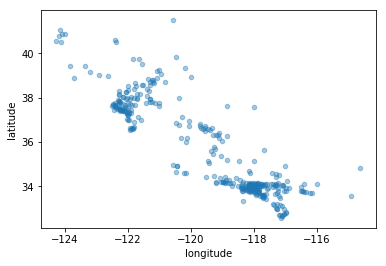

In [28]:
import matplotlib.pyplot as plt
old_names = ['lat','lon']
new_names = ['latitude', 'longitude']

df_coord.rename(columns=dict(zip(old_names, new_names)), inplace=True)
df_coord.head()

df_coord.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4)
plt.show()

In [29]:
# Coordinate for two cities were manually corrected 
# Hillsborough, CA, USA coordinates
# Ontario, CA, USA coordinates
#del df_coord
#file = './df_coord.csv' 
#df_coord = pd.read_csv(file, encoding='latin-1',  index_col='Unnamed: 0') 
#df_coord

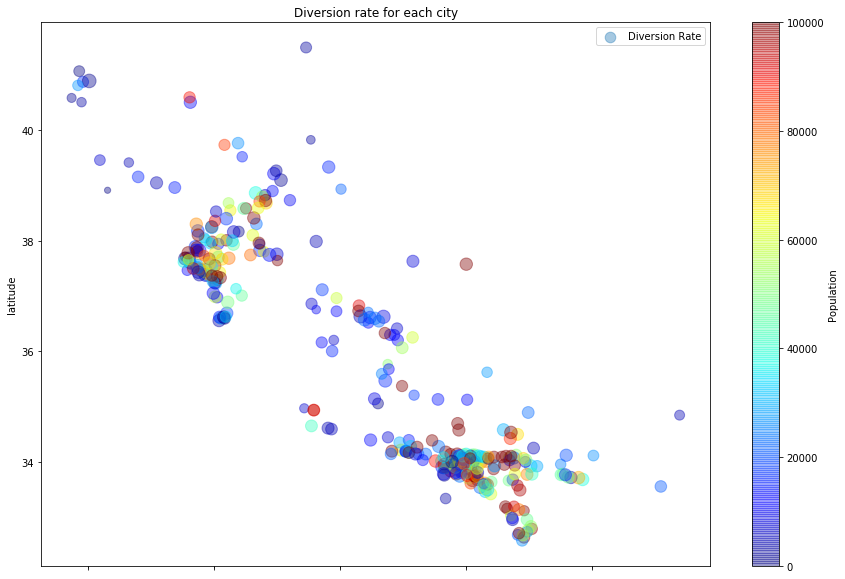

In [30]:
old_names = ['lat','lon']
new_names = ['latitude', 'longitude']
df_coord.plot(kind="scatter", x="longitude", y="latitude",
    s=df_coord['DiversionRateHouse']*200, label="Diversion Rate",
    c="Population", cmap=plt.get_cmap("jet") , vmin=-1, vmax=100000,
    colorbar=True, alpha=0.4, figsize=(15,10))
plt.title("Diversion rate for each city")
plt.legend()
plt.show()

The following plot shows the diversion rates in different cities. The colorbar represents the population and circle size shows the diversion rates. 

### 4-1-4- Change in diversion rates distribution between 2013 to 2016
The following plot shows distribution of diversion rates betwen 2013-2016. As can be seen the diversion rates have been degraded in 2016. 

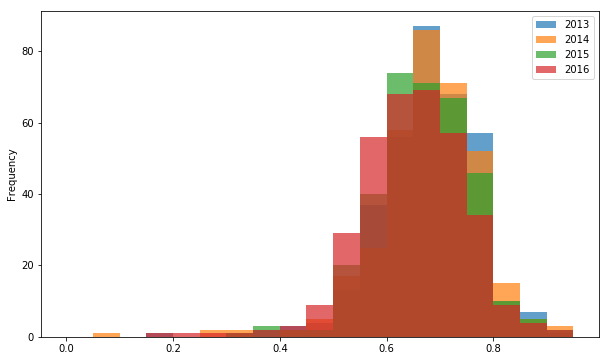

In [31]:
tmp = data[['DiversionRateHouse','year']]
tmp2 = tmp.groupby('year')['DiversionRateHouse']
bin_values = np.arange(start=0, stop=1, step=0.05)
tmp2.plot(kind='hist', bins=bin_values, figsize=[10,6], alpha=0.7, legend=True) # alpha for transparency  
plt.show()

### 4-1-5- Diversion rates vs domgraphic data

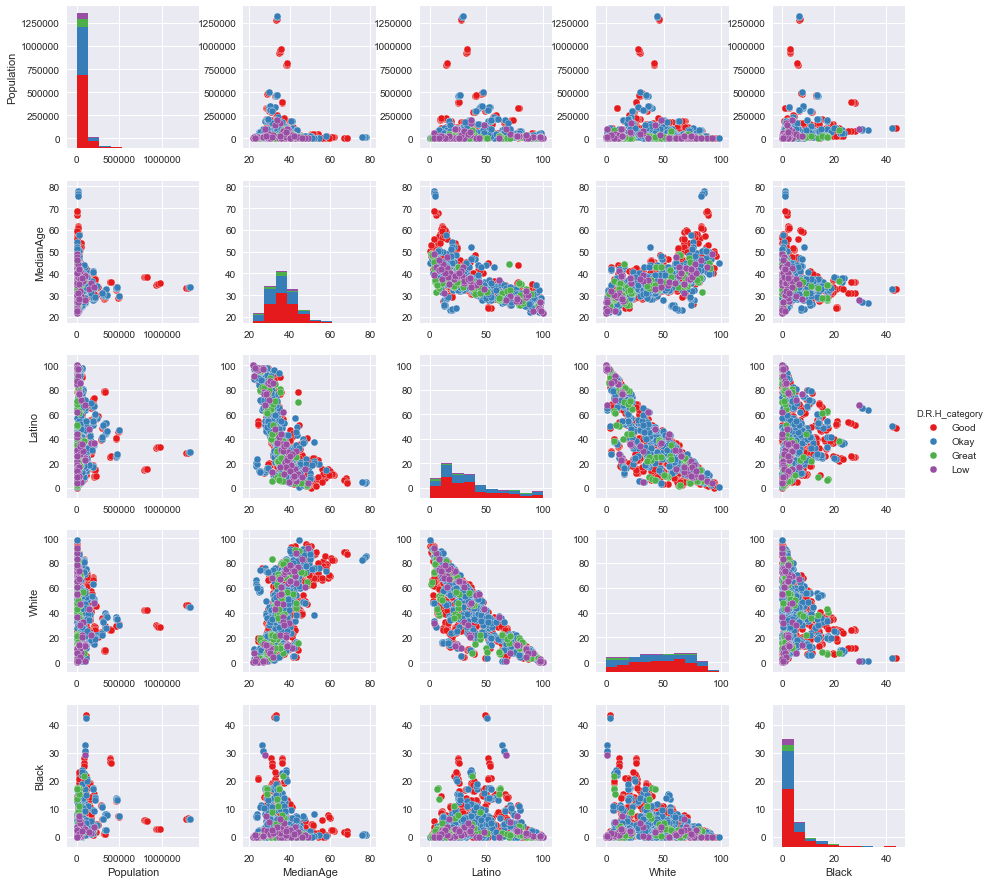

In [33]:
import seaborn as sns
df_tmp = data.iloc[:,7:13]
df_tmp
sns.pairplot(df_tmp, hue="D.R.H_category" , palette="Set1")#, markers=['o','o','o','o'])
plt.show()

### 4-1-6- Diversion rates vs economic data

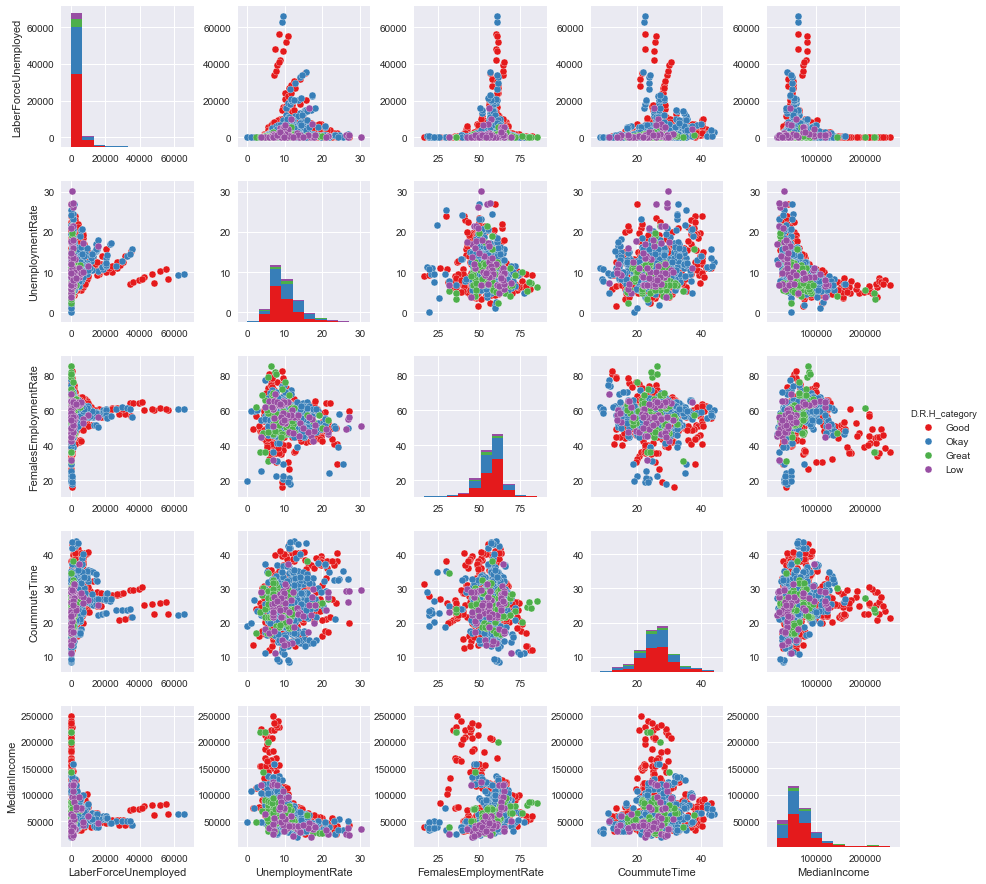

In [34]:
df_tmp = data.iloc[:,[7,16,17,18,19,20]]
df_tmp

sns.pairplot(df_tmp, hue="D.R.H_category", palette="Set1")
plt.show()

### 4-1-7- Diversion rates vs housing data

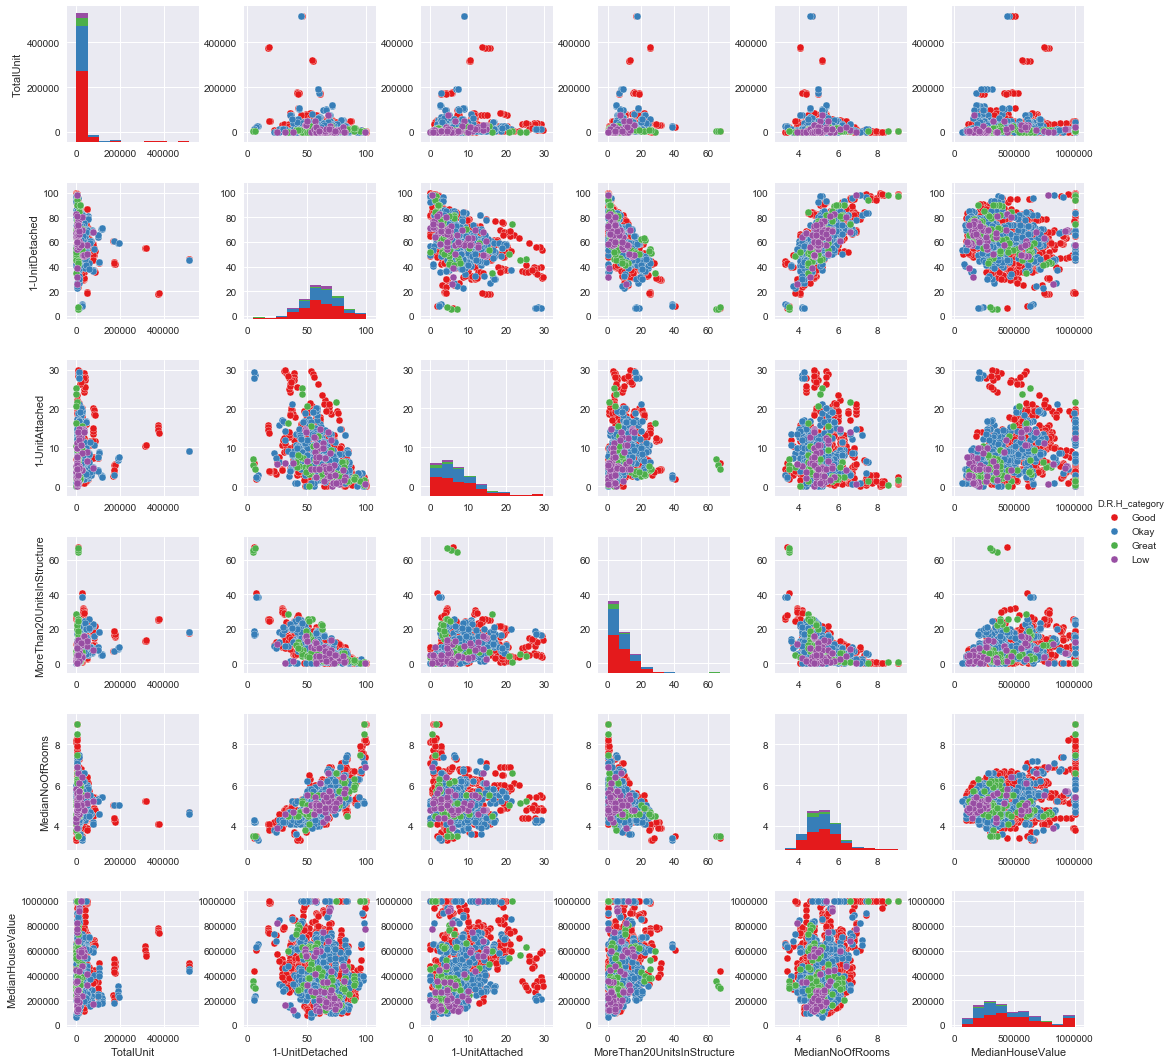

In [35]:
df_tmp = data.iloc[:,[7,22,23,24,25,26, 27]]
df_tmp
sns.pairplot(df_tmp, hue="D.R.H_category", palette="Set1")
plt.show()

# 5- Clustering (K-Means) 
In order to classifiy the cities, we need a way to compare them. To do this we're going to use K-Means clustering. K-means is a way of taking a dataset and finding groups (or clusters) of points that have similar properties. K-means works by grouping the points together in such a way that the distance between all the points and the midpoint of the cluster they belong to is minimized.

I are looking at groups of cities that have similar economic, housing, demographic, and political characteristics

I'm tring to understand
Is there any relation between these groups and diversion rate? 


In [36]:
%matplotlib inline
import random
import matplotlib
import seaborn as sns
from sklearn.cluster import KMeans

The first thing we need is a way to compare cities. To do this, we're going to create a matrix that contains each city and it's demographic, economic, and housing characteristics. 

In [37]:
file = 'data.csv' 
data = pd.read_csv(file, encoding='latin-1',  index_col='Unnamed: 0' )
data.head()

,Jurisdiction,year,County,DiversionRateHouse,DiversionRateNoOfEmployee,Bins,D.R.E_category,D.R.H_category,Population,MedianAge,...,CoummuteTime,MedianIncome,PovertyRate,TotalUnit,1-UnitDetached,1-UnitAttached,MoreThan20UnitsInStructure,MedianNoOfRooms,MedianHouseValue,MedianGrossRent
0,Adelanto,2013,San Bernardino,0.768116,0.729064,"(0.65, 0.8]",Good,Good,29764.0,24.5,...,39.5,43305.0,25.6,8291.0,79.1,2.2,3.3,5.7,170500.0,988.0
1,Agoura Hills,2013,Los Angeles,0.607143,0.674342,"(0.5, 0.65]",Good,Okay,20328.0,43.5,...,28.8,106886.0,4.0,7681.0,70.2,13.4,7.6,6.6,740200.0,2000.0
2,Alameda,2013,Alameda,0.763636,0.808411,"(0.65, 0.8]",Great,Good,72512.0,40.2,...,27.2,74221.0,10.1,31572.0,42.3,10.3,16.7,4.7,662300.0,1250.0
4,Albany,2013,Alameda,0.810000,0.782383,"(0.8, 1.0]",Good,Great,17921.0,36.2,...,29.1,71994.0,8.7,7755.0,53.5,3.7,13.9,4.6,625400.0,1409.0
5,Alhambra,2013,Los Angeles,0.684211,0.701389,"(0.65, 0.8]",Good,Good,83389.0,38.7,...,29.1,51527.0,12.7,30551.0,44.5,12.5,9.8,4.4,514800.0,1126.0


## 5-1- Apply the K-means
Now to create the clusters, I'm going to use the K-Means functionality from sci-kit-learn.  There are some algorithms for estimating the number of clusters such as scree plot and Silhouette plot. However, I chose 4 clusters since increasing the number of cluster results in a very low population in the fifth, and ... clusters.  

In [38]:
cluster = KMeans(n_clusters=4)
data['cluster'] = cluster.fit_predict(data.iloc[:,8:])
data.cluster.value_counts()

0    738
3    460
1    171
2     12
Name: cluster, dtype: int64

## 5-2- Visualization 
### 5-2-1- Number of cities in each cluster

   cluster  D.R.H_category
0        0             736
1        1             171
2        2              12
3        3             460


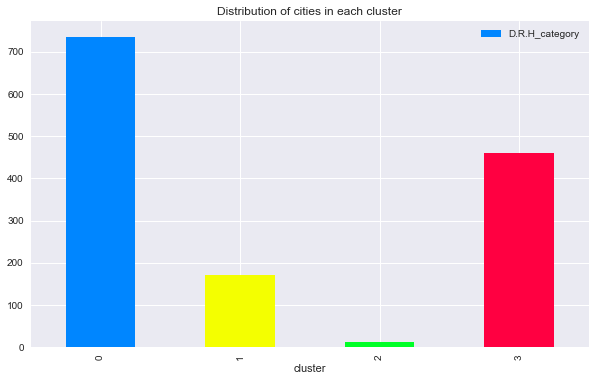

In [39]:
color_tmp = pd.DataFrame({'id': range(1,11), 'normcolor': np.random.rand(10), 'count': np.random.randint(0,100,(10))})
colors = matplotlib.cm.hsv(color_tmp['normcolor'])

DR_cluster=data[['D.R.H_category','cluster']]
x1 = DR_cluster.groupby( ['cluster']).count()
print (x1.reset_index())
x1.plot.bar(color=[colors],title= "Distribution of cities in each cluster", figsize=(10, 6))

### 5-2-2- Number of cities in each diversion rate category

  D.R.H_category  cluster
0           Good      762
1          Great       72
2            Low       58
3           Okay      487


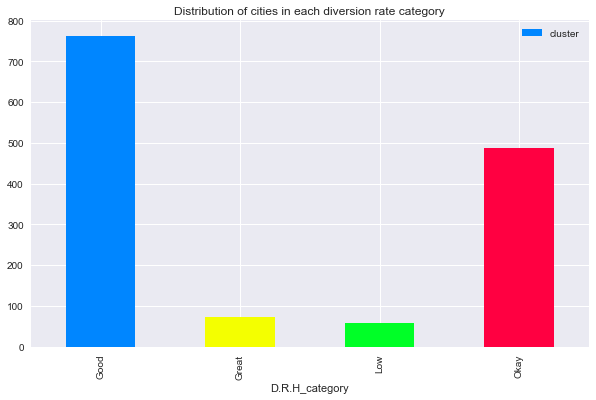

In [40]:
x2 = DR_cluster.groupby( ['D.R.H_category']).count()
print (x2.reset_index())
plt.figure(figsize=(10,6))
x2.plot.bar(color=[colors],title= "Distribution of cities in each diversion rate category",figsize=(10, 6))


### 5-2-3- Frequency of clusters in each diversion rate category

In [41]:
data['idx'] = np.ones(len(data))
DR_cluster=data[['D.R.H_category','cluster', 'idx']]
DR_cluster.head()

,D.R.H_category,cluster,idx
0,Good,0,1.0
1,Okay,1,1.0
2,Good,3,1.0
4,Great,3,1.0
5,Good,3,1.0


                  idx                    
cluster             0      1     2      3
D.R.H_category                           
Good            337.0  124.0  10.0  291.0
Great            47.0    7.0   NaN   18.0
Low              38.0    7.0   NaN   13.0
Okay            314.0   33.0   2.0  138.0


Text(0,0.5,'Frequency')

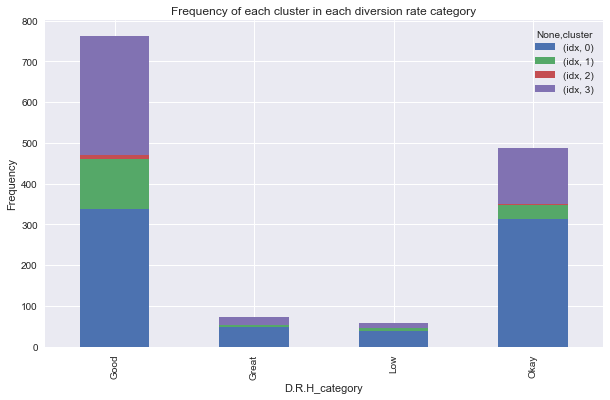

In [42]:
DR_cluster_table = pd.pivot_table(DR_cluster,index=["D.R.H_category", "cluster"],values=["idx"],aggfunc=np.sum)
print (DR_cluster_table.unstack())
g = DR_cluster_table.unstack().plot(kind='bar',stacked=True,title="Frequency of each cluster in each diversion rate category",figsize=(10, 6))
#g.set_xlabel("  ")
g.set_ylabel("Frequency")

### 5-2-4- Frequency of diversion rate categories in each cluster

                  idx                   
D.R.H_category   Good Great   Low   Okay
cluster                                 
0               337.0  47.0  38.0  314.0
1               124.0   7.0   7.0   33.0
2                10.0   NaN   NaN    2.0
3               291.0  18.0  13.0  138.0


Text(0,0.5,'Frequency')

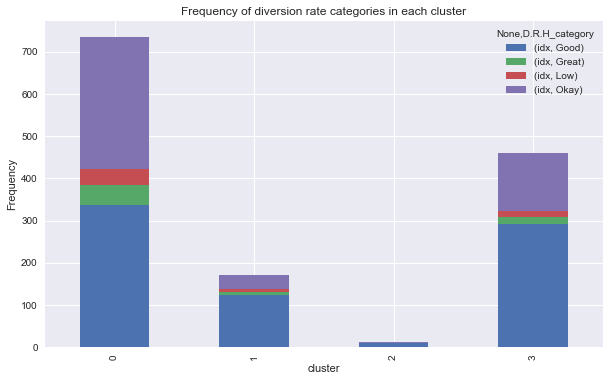

In [43]:
DR_cluster_table = pd.pivot_table(DR_cluster,index=["cluster","D.R.H_category"],values=["idx"],aggfunc=np.sum)
print (DR_cluster_table.unstack())
g = DR_cluster_table.unstack().plot(kind='bar',stacked=True,title="Frequency of diversion rate categories in each cluster",figsize=(10, 6))
g.set_ylabel("Frequency")

### 5-2-5- Diversion rate for each cluster 
As can be seen in each cluster we can find the cities with similar demographic, economic, and housing characteristics have significantly different diversion rates. We can single out the outlier in each cluster and target those cities for recycling campaign.

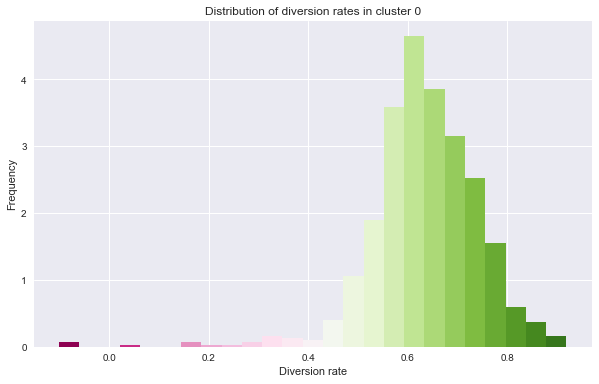

In [44]:
DR_cluster=data[['DiversionRateHouse','cluster']]
cluster0 = DR_cluster.loc[DR_cluster['cluster'] == 0]
plt.figure(figsize=(10,6))
cm = plt.cm.get_cmap('PiYG')

# Get the histogramp
Y,X = np.histogram(cluster0['DiversionRateHouse'], 25, normed=1)
x_span = X.max()-X.min()
C = [cm(((x-X.min())/x_span)) for x in X]
plt.bar(X[:-1],Y,color=C,width=X[1]-X[0])
plt.title('Distribution of diversion rates in cluster 0')
plt.xlabel('Diversion rate')
plt.ylabel('Frequency')
plt.show()

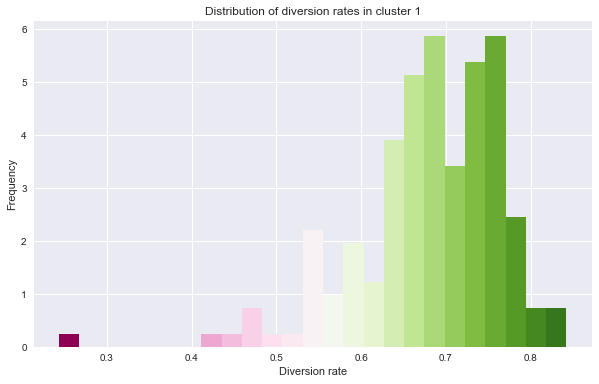

In [45]:
DR_cluster=data[['DiversionRateHouse','cluster']]
cluster0 = DR_cluster.loc[DR_cluster['cluster'] == 1]
plt.figure(figsize=(10,6))
cm = plt.cm.get_cmap('PiYG')

# Get the histogramp
Y,X = np.histogram(cluster0['DiversionRateHouse'], 25, normed=1)
x_span = X.max()-X.min()
C = [cm(((x-X.min())/x_span)) for x in X]
plt.bar(X[:-1],Y,color=C,width=X[1]-X[0])
plt.title('Distribution of diversion rates in cluster 1')
plt.xlabel('Diversion rate')
plt.ylabel('Frequency')
plt.show()

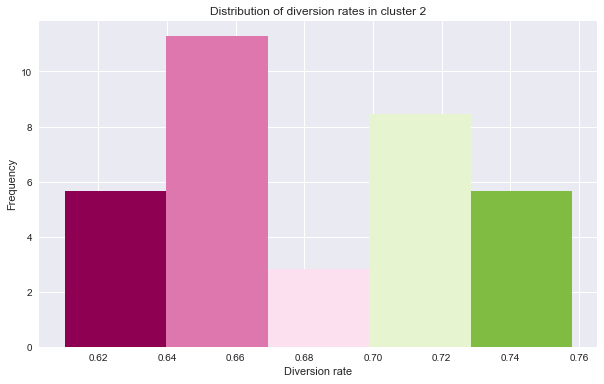

In [48]:
DR_cluster=data[['DiversionRateHouse','cluster']]
cluster0 = DR_cluster.loc[DR_cluster['cluster'] == 2]
plt.figure(figsize=(10,6))
cm = plt.cm.get_cmap('PiYG')

# Get the histogramp
Y,X = np.histogram(cluster0['DiversionRateHouse'], 5, normed=1)
x_span = X.max()-X.min()
C = [cm(((x-X.min())/x_span)) for x in X]
plt.bar(X[:-1],Y,color=C,width=X[1]-X[0])
plt.title('Distribution of diversion rates in cluster 2')
plt.xlabel('Diversion rate')
plt.ylabel('Frequency')
plt.show()

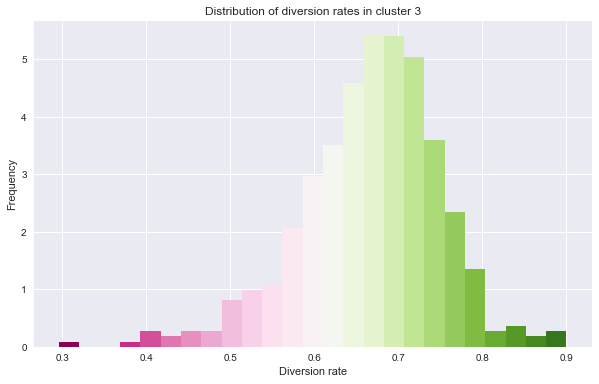

In [49]:
DR_cluster=data[['DiversionRateHouse','cluster']]
cluster0 = DR_cluster.loc[DR_cluster['cluster'] == 3]
plt.figure(figsize=(10,6))
cm = plt.cm.get_cmap('PiYG')

# Get the histogramp
Y,X = np.histogram(cluster0['DiversionRateHouse'], 25, normed=1)
x_span = X.max()-X.min()
C = [cm(((x-X.min())/x_span)) for x in X]
plt.bar(X[:-1],Y,color=C,width=X[1]-X[0])
plt.title('Distribution of diversion rates in cluster 3')
plt.xlabel('Diversion rate')
plt.ylabel('Frequency')
plt.show()

### 5-2-6- Visualizing the clusters using PCA
I have used Principal Component Analysis (PCA) to visualize the data. I have transformed the multi-dimensional dataset into a 2 dimensional dataset to simply show the clusters in 2D space.  

In [56]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
data['x'] = pca.fit_transform(data.iloc[:,8:])[:,0]
data['y'] = pca.fit_transform(data.iloc[:,8:])[:,1]
DR_clusters = data[['D.R.H_category', 'cluster', 'x', 'y']]
DR_clusters.head()

,D.R.H_category,cluster,x,y
0,Good,0,-486738.580111,-92205.420157
1,Okay,1,506214.281948,-100230.566986
2,Good,3,365948.074943,18659.448125
4,Great,3,302237.067816,-106623.050630
5,Good,3,107697.586765,38050.974515


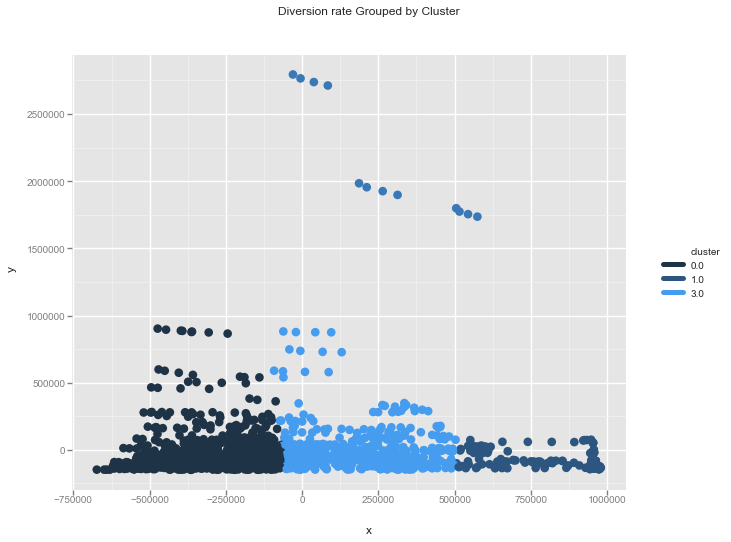

<ggplot: (16426546)>

In [58]:
from ggplot import *
import warnings
warnings.filterwarnings('ignore')
ggplot(DR_clusters, aes(x='x', y='y', color='cluster')) + \
    geom_point(size=75) + \
    ggtitle("Diversion rate Grouped by Cluster")

# 6 - Conclusion
Using K-Means clustering method I was able to cluster the cities into 4 clusters based on their socio-economic characteristics. 
In each cluster, I was able to detect the cities that their diversion rates are significantly lower than the other cities in the same cluster with the same socio-economic characteristics. It can help NGOs, environmental activists, or local officials to figure out what are the reasons for lower diversion rates in those cities, and what steps can be taken to improve the diversion rate.   
